<a href="https://colab.research.google.com/github/rkassila/Medical_AImaging/blob/going_local/notebooks/Small_models_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Drive and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import pathlib
import keras
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from transformers import TFAutoModelForImageClassification, AutoImageProcessor

from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.applications import imagenet_utils, efficientnet

from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, concatenate, UpSampling2D

# Import images

In [3]:
limite = 200

In [4]:
base_url = '/content/drive/My Drive/Colab_Notebooks/data/'

## Knee

In [337]:
url_knee = base_url + 'MR/knee/'
url_knee_normal = url_knee + 'normal/'
url_knee_acl_pathology = url_knee + 'acl_pathology/'
url_knee_bone_inflammation = url_knee + 'bone_inflammation/'
url_knee_chondral_abnormality = url_knee + 'chondral_abnormality/'
url_knee_fracture = url_knee + 'fracture/'
url_knee_intra = url_knee + 'intra/'
url_knee_meniscal_abnormality = url_knee + 'meniscal_abnormality/'
url_knee_patella_pathology = url_knee + 'patella_pathology/'
url_knee_pcl_pathology = url_knee + 'pcl_pathology/'
url_knee_soft_tissue_fluid = url_knee + 'soft_tissue_fluid_collection/'

In [338]:
# Read and convert images to grayscale
images_knee_normal = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_normal + "*.png")[:limite]]
images_knee_acl_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_acl_pathology + "*.png")[:limite]]
images_knee_bone_inflammation = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_bone_inflammation + "*.png")[:limite]]
images_knee_chondral_abnormality = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_chondral_abnormality + "*.png")[:limite]]
images_knee_fracture = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_fracture + "*.png")[:limite]]
images_knee_intra = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_intra + "*.png")[:limite]]
images_knee_meniscal_abnormality = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_meniscal_abnormality + "*.png")[:limite]]
images_knee_patella_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_patella_pathology + "*.png")[:limite]]
images_knee_pcl_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_pcl_pathology + "*.png")[:limite]]
images_knee_soft_tissue_fluid = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_knee_soft_tissue_fluid + "*.png")[:limite]]

In [339]:
labels_knee_normal = [10] * len(images_knee_normal)
labels_knee_acl_pathology = [1] * len(images_knee_acl_pathology)
labels_knee_bone_inflammation = [2] * len(images_knee_bone_inflammation)
labels_knee_chondral_abnormality = [3] * len(images_knee_chondral_abnormality)
labels_knee_fracture = [4] * len(images_knee_fracture)
labels_knee_intra = [5] * len(images_knee_intra)
labels_knee_meniscal_abnormality = [6] * len(images_knee_meniscal_abnormality)
labels_knee_patella_pathology = [7] * len(images_knee_patella_pathology)
labels_knee_pcl_pathology = [8] * len(images_knee_pcl_pathology)
labels_knee_soft_tissue_fluid = [0] * len(images_knee_soft_tissue_fluid)

## Brain

In [8]:
url_brain = base_url + 'MR/brain/'

url_normal = url_brain + 'normal/'

url_acute_infarct = url_brain + 'acute_infarct/'
url_chronic_infarct = url_brain + 'chronic_infarct/'
url_extra = url_brain + 'extra/'
url_focal_flair_hyper = url_brain + 'focal_flair_hyper/'
url_intra = url_brain + 'intra/'
url_white_matter_changes = url_brain + 'white_matter_changes/'

In [21]:
# Read and convert images to grayscale
images_brain_normal = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_normal + "*.png")[:limite]]
images_acute_infarct = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_acute_infarct + "*.png")[:limite]]
images_chronic_infarct = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_chronic_infarct + "*.png")[:limite]]
images_extra = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_extra + "*.png")[:limite]]
images_focal_flair_hyper = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_focal_flair_hyper + "*.png")[:limite]]
images_intra_brain = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_intra + "*.png")[:limite]]
images_white_matter_changes = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_white_matter_changes + "*.png")[:limite]]

In [22]:
labels_brain_normal = [6] * len(images_brain_normal)

labels_acute_infarct = [0] * len(images_acute_infarct)
labels_chronic_infarct = [1] * len(images_chronic_infarct)
labels_extra = [2] * len(images_extra)
labels_focal_flair_hyper = [3] * len(images_focal_flair_hyper)
labels_intra_brain = [4] * len(images_intra_brain)
labels_white_matter_changes = [5] * len(images_white_matter_changes)

## Shoulder

In [10]:
url_shoulder = base_url + 'MR/shoulder/'

url_normal_shoulder = url_shoulder + 'normal/'

url_acj_oa = url_shoulder + 'acj_oa/'
url_biceps_pathology = url_shoulder + 'biceps_pathology/'
url_ghj_oa = url_shoulder + 'ghj_oa/'
url_labral_pathology = url_shoulder + 'labral_pathology/'
url_marrow_inflammation = url_shoulder + 'marrow_inflammation/'
url_osseous_lesion = url_shoulder + 'osseous_lesion/'
url_post_op = url_shoulder + 'post_op/'
url_soft_tissue_edema = url_shoulder + 'soft_tissue_edema/'
url_soft_tissue_fluid_shoulder = url_shoulder + 'soft_tissue_fluid/'
url_supraspinatus_pathology = url_shoulder + 'supraspinatus_pathology/'

In [23]:
# Read and convert images to grayscale
images_normal_shoulder = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_normal_shoulder + "*.png")[:limite]]
images_acj_oa = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_acj_oa + "*.png")[:limite]]
images_biceps_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_biceps_pathology + "*.png")[:limite]]
images_ghj_oa = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_ghj_oa + "*.png")[:limite]]
images_labral_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_labral_pathology + "*.png")[:limite]]
images_marrow_inflammation = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_marrow_inflammation + "*.png")[:limite]]
images_osseous_lesion = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_osseous_lesion + "*.png")[:limite]]
images_post_op = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_post_op + "*.png")[:limite]]
images_soft_tissue_edema = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_soft_tissue_edema + "*.png")[:limite]]
images_soft_tissue_fluid_shoulder = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_soft_tissue_fluid_shoulder + "*.png")[:limite]]
images_supraspinatus_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_supraspinatus_pathology + "*.png")[:limite]]

In [24]:
labels_normal_shoulder = [10] * len(images_normal_shoulder)

labels_acj_oa = [0] * len(images_acj_oa)
labels_biceps_pathology = [1] * len(images_biceps_pathology)
labels_ghj_oa = [2] * len(images_ghj_oa)
labels_labral_pathology = [3] * len(images_labral_pathology)
labels_marrow_inflammation = [4] * len(images_marrow_inflammation)
labels_osseous_lesion = [5] * len(images_osseous_lesion)
labels_post_op = [6] * len(images_post_op)
labels_soft_tissue_edema = [7] * len(images_soft_tissue_edema)
labels_soft_tissue_fluid_shoulder = [8] * len(images_soft_tissue_fluid_shoulder)
labels_supraspinatus_pathology = [9] * len(images_supraspinatus_pathology)

## Spine

In [12]:
url_spine = base_url + 'MR/spine/'

url_normal_spine = url_spine + 'normal/'

url_cord_pathology = url_spine + 'cord_pathology/'
url_cystic_lesions = url_spine + 'cystic_lesions/'
url_disc_pathology = url_spine + 'disc_pathology/'
url_osseous_abn = url_spine + 'osseous_abn/'

In [25]:
# Read and convert images to grayscale
images_normal_spine = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_normal_spine + "*.png")[:limite]]
images_cord_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_cord_pathology + "*.png")[:limite]]
images_cystic_lesions = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_cystic_lesions + "*.png")[:limite]]
images_disc_pathology = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_disc_pathology + "*.png")[:limite]]
images_osseous_abn = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_osseous_abn + "*.png")[:limite]]

In [26]:
labels_normal_spine = [4] * len(images_normal_spine)

labels_cord_pathology = [0] * len(images_cord_pathology)
labels_cystic_lesions = [1] * len(images_cystic_lesions)
labels_disc_pathology = [2] * len(images_disc_pathology)
labels_osseous_abn = [3] * len(images_osseous_abn)

## Lung

In [14]:
url_lung = base_url + 'CT/lung/'

url_normal_lung = url_lung + 'normal/'

url_airspace_opacity = url_lung + 'Airspace_opacity/'
url_bronchiectasis = url_lung + 'Bronchiectasis/'
url_nodule = url_lung + 'Nodule/'
url_parenchyma_destruction = url_lung + 'Parenchyma_destruction/'
url_interstitial_lung_disease = url_lung + 'interstitial_lung_disease/'

In [27]:
# Read and convert images to grayscale
images_normal_lung = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_normal_lung + "*.png")[:limite]]
images_airspace_opacity = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_airspace_opacity + "*.png")[:limite]]
images_bronchiectasis = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_bronchiectasis + "*.png")[:limite]]
images_nodule = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_nodule + "*.png")[:limite]]
images_parenchyma_destruction = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_parenchyma_destruction + "*.png")[:limite]]
images_interstitial_lung_disease = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(url_interstitial_lung_disease + "*.png")[:limite]]

In [28]:
labels_normal_lung = [5] * len(images_normal_lung)

labels_airspace_opacity = [0] * len(images_airspace_opacity)
labels_bronchiectasis = [1] * len(images_bronchiectasis)
labels_nodule = [2] * len(images_nodule)
labels_parenchyma_destruction = [3] * len(images_parenchyma_destruction)
labels_interstitial_lung_disease = [4] * len(images_interstitial_lung_disease)

# Checking data

In [29]:
normal_knee_count = len(images_acute_infarct)
normal_knee_count

200

In [30]:
images_acute_infarct[0].shape

(224, 224)

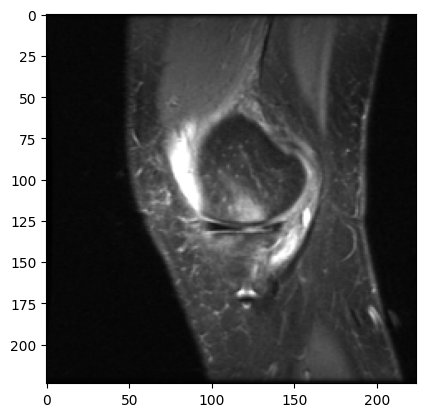

In [344]:
img = np.asarray(images_knee_soft_tissue_fluid[3])
imgplot = plt.imshow(img, cmap='gray')

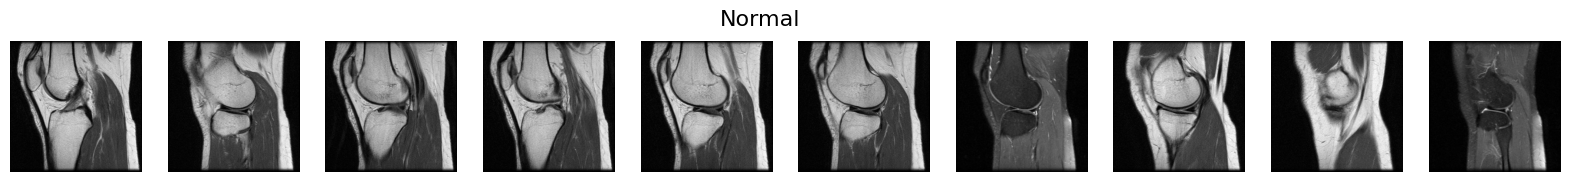

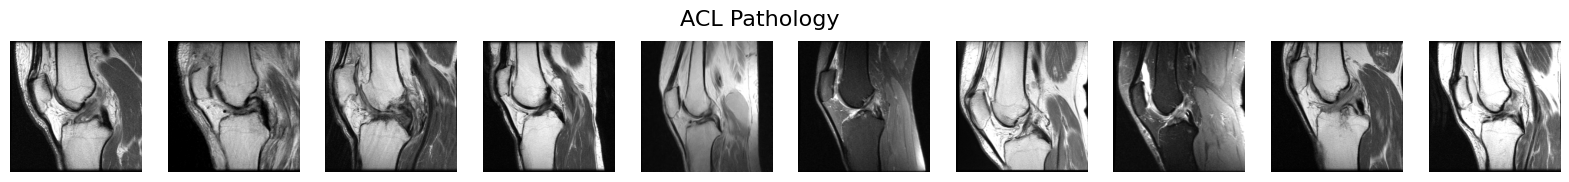

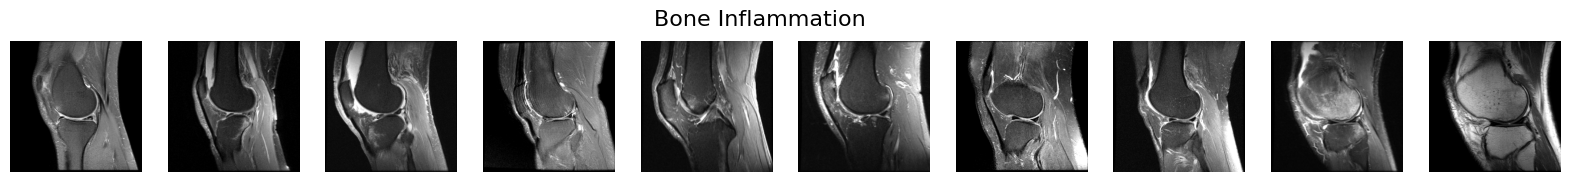

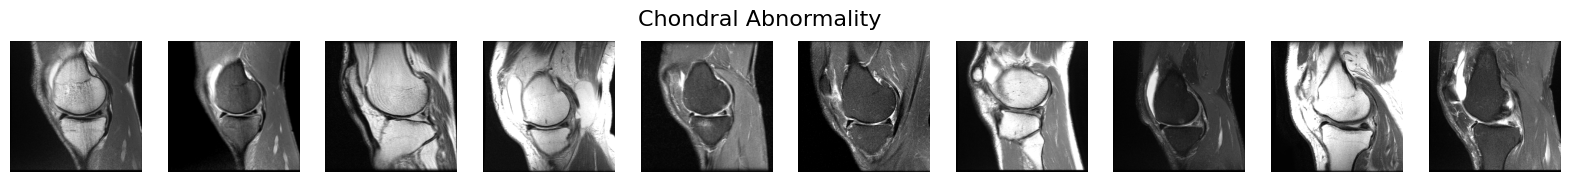

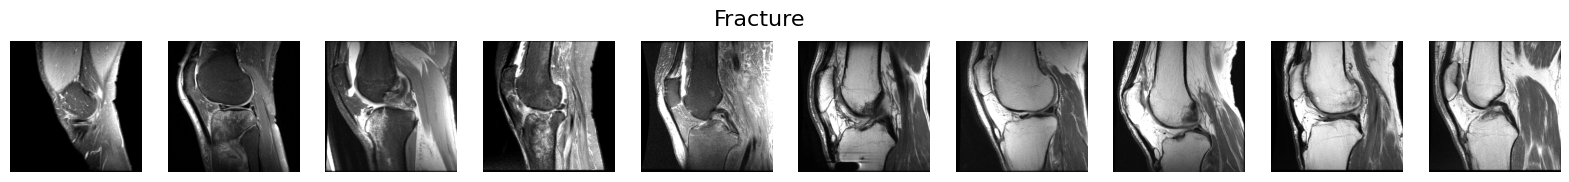

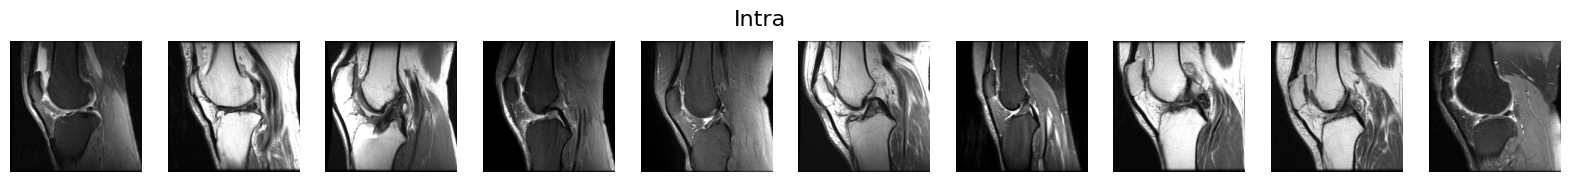

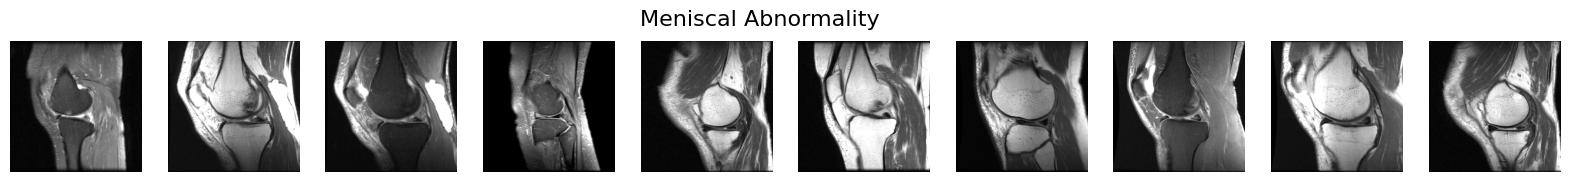

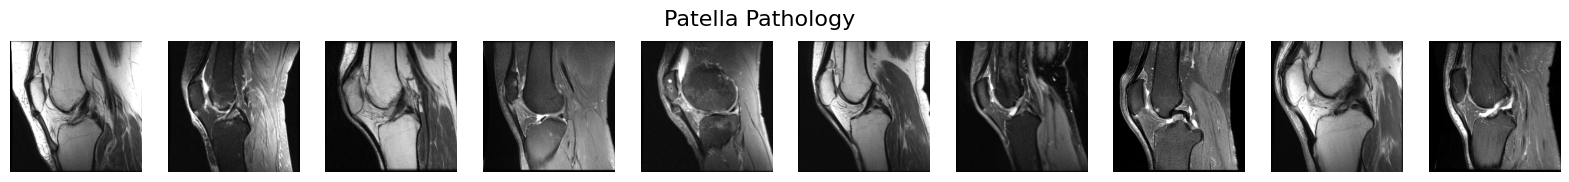

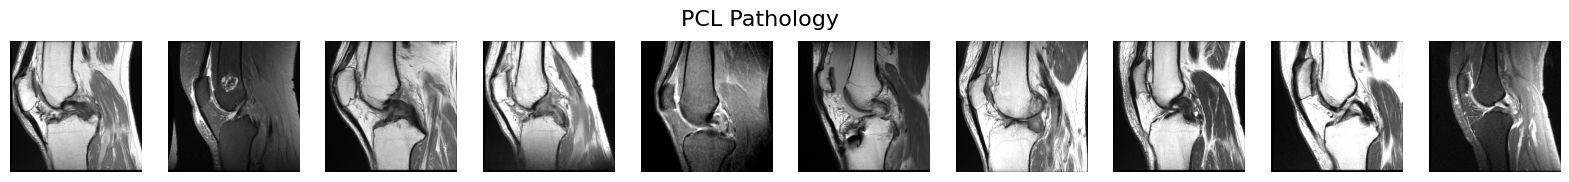

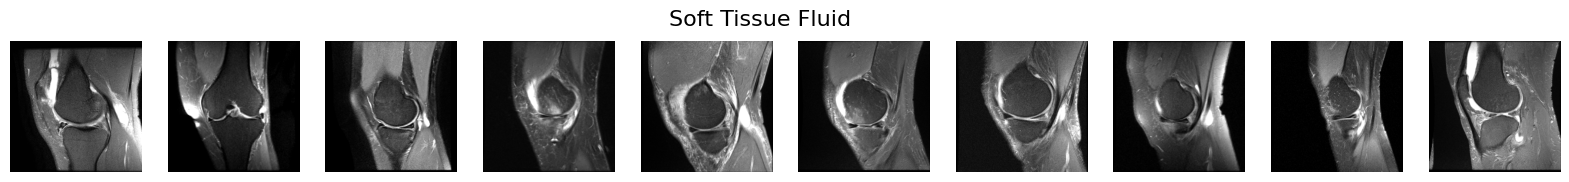

In [365]:
import matplotlib.pyplot as plt

# Define a function to display images
def display_images(images, class_name):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    fig.suptitle(class_name, fontsize=16)
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

# Display 10 images for each class
classes = ['Normal', 'ACL Pathology', 'Bone Inflammation', 'Chondral Abnormality', 'Fracture',
           'Intra', 'Meniscal Abnormality', 'Patella Pathology', 'PCL Pathology', 'Soft Tissue Fluid']

image_lists = [images_knee_normal, images_knee_acl_pathology, images_knee_bone_inflammation,
               images_knee_chondral_abnormality, images_knee_fracture, images_knee_intra,
               images_knee_meniscal_abnormality, images_knee_patella_pathology,
               images_knee_pcl_pathology, images_knee_soft_tissue_fluid]

for i, class_images in enumerate(image_lists):
    display_images(class_images[:10], classes[i])


# Creating simple model

In [109]:
def initialize_model(length):

    model = models.Sequential()

    model.add(layers.Conv2D(16, (4,4), activation="tanh", input_shape=(224, 224,1)))
    model.add(layers.MaxPool2D(pool_size=(4,4)))

    model.add(layers.Conv2D(32, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(length, activation='softmax'))

    ### Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


    return model

In [120]:
def initialize_model(length):

    model = models.Sequential()

    model.add(layers.Conv2D(16, (4,4), activation="tanh", input_shape=(224, 224,1)))
    model.add(layers.MaxPool2D(pool_size=(4,4)))

    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(length, activation='softmax'))

    ### Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


    return model

# Data normalization

In [103]:
def normalize_images(images):
    # Concatenate all images into a single array
    concatenated_images = np.concatenate(images, axis=0)

    max_pixel_value = 255

    # Normalize the concatenated images
    normalized_images = concatenated_images.astype(np.float32) / max_pixel_value

    return normalized_images

In [345]:
# Define lists of images for each organ
lung_images = [images_normal_lung, images_airspace_opacity, images_bronchiectasis, images_nodule, images_parenchyma_destruction, images_interstitial_lung_disease]
brain_images = [images_acute_infarct, images_chronic_infarct, images_extra, images_focal_flair_hyper, images_intra_brain, images_white_matter_changes]
knee_images = [images_knee_normal, images_knee_acl_pathology, images_knee_bone_inflammation, images_knee_chondral_abnormality, images_knee_fracture, images_knee_intra, images_knee_meniscal_abnormality, images_knee_patella_pathology, images_knee_pcl_pathology, images_knee_soft_tissue_fluid]
shoulder_images = [images_normal_shoulder, images_acj_oa, images_biceps_pathology, images_ghj_oa, images_labral_pathology, images_marrow_inflammation, images_osseous_lesion, images_post_op, images_soft_tissue_edema, images_soft_tissue_fluid_shoulder, images_supraspinatus_pathology]
spine_images = [images_normal_spine, images_cord_pathology, images_cystic_lesions, images_disc_pathology, images_osseous_abn]

In [346]:
# Normalize images for each organ
normalized_lung_X = normalize_images(lung_images)
normalized_brain_X = normalize_images(brain_images)
normalized_knee_X = normalize_images(knee_images)
normalized_shoulder_X = normalize_images(shoulder_images)
normalized_spine_X = normalize_images(spine_images)

In [347]:
# Print the shape of the normalized arrays for each organ
print("Shape of normalized lung images:", normalized_lung_X.shape)
print("Shape of normalized brain images:", normalized_brain_X.shape)
print("Shape of normalized knee images:", normalized_knee_X.shape)
print("Shape of normalized shoulder images:", normalized_shoulder_X.shape)
print("Shape of normalized spine images:", normalized_spine_X.shape)

Shape of normalized lung images: (1200, 224, 224)
Shape of normalized brain images: (1200, 224, 224)
Shape of normalized knee images: (2000, 224, 224)
Shape of normalized shoulder images: (2200, 224, 224)
Shape of normalized spine images: (1000, 224, 224)


In [348]:
# Concatenate the labels for each organ
y_lung = np.concatenate((labels_normal_lung, labels_airspace_opacity, labels_bronchiectasis, labels_nodule, labels_parenchyma_destruction, labels_interstitial_lung_disease))
y_brain = np.concatenate((labels_acute_infarct, labels_chronic_infarct, labels_extra, labels_focal_flair_hyper, labels_intra_brain, labels_white_matter_changes))
y_knee = np.concatenate((labels_knee_normal, labels_knee_acl, labels_knee_bone_inf, labels_knee_chondral, labels_knee_fracture, labels_knee_intra, labels_knee_meniscal, labels_knee_patella, labels_knee_pcl, labels_knee_soft_fluid))
y_shoulder = np.concatenate((labels_normal_shoulder, labels_acj_oa, labels_biceps_pathology, labels_ghj_oa, labels_labral_pathology, labels_marrow_inflammation, labels_osseous_lesion, labels_post_op, labels_soft_tissue_edema, labels_soft_tissue_fluid_shoulder, labels_supraspinatus_pathology))
y_spine = np.concatenate((labels_normal_spine, labels_cord_pathology, labels_cystic_lesions, labels_disc_pathology, labels_osseous_abn))

# Testing simple model (with lung)

In [110]:
X = normalized_lung_X
y = y_lung

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [112]:
def reshape_data_for_convolutional(X):
    """
    Reshape input data for convolutional neural networks.

    Parameters:
        X (numpy.ndarray): Input data array with shape (num_samples, height, width).

    Returns:
        numpy.ndarray: Reshaped input data array with shape (num_samples, height, width, 1).
    """
    return X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [113]:
X_train.shape

(960, 224, 224)

In [114]:
# Reshape X_train to include the channel dimension
X_train_reshaped = reshape_data_for_convolutional(X_train)
X_test_reshaped = reshape_data_for_convolutional(X_test)

# Verify the new shape
print("New shape of X_train:", X_train_reshaped.shape)
print("New shape of X_test:", X_test_reshaped.shape)

New shape of X_train: (960, 224, 224, 1)
New shape of X_test: (240, 224, 224, 1)


In [121]:
model = initialize_model(len(set(y)))

In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 221, 221, 16)      272       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 55, 55, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 53, 53, 64)        9280      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 26, 26, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 256)       147712    
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 12, 12, 256)      

In [123]:
es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train,
                    epochs=40,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)


Epoch 1/40
12/12 [==============================] - 3s 36ms/step - loss: 1.8034 - accuracy: 0.1914 - val_loss: 1.7873 - val_accuracy: 0.1771
Epoch 2/40
12/12 [==============================] - 0s 15ms/step - loss: 1.7219 - accuracy: 0.2409 - val_loss: 1.5895 - val_accuracy: 0.2917
Epoch 3/40
12/12 [==============================] - 0s 14ms/step - loss: 1.4741 - accuracy: 0.3320 - val_loss: 1.8106 - val_accuracy: 0.2604
Epoch 4/40
12/12 [==============================] - 0s 14ms/step - loss: 1.5421 - accuracy: 0.2943 - val_loss: 1.6159 - val_accuracy: 0.2865
Epoch 5/40
12/12 [==============================] - 0s 19ms/step - loss: 1.4478 - accuracy: 0.3372 - val_loss: 1.4406 - val_accuracy: 0.3594
Epoch 6/40
12/12 [==============================] - 0s 15ms/step - loss: 1.3298 - accuracy: 0.3971 - val_loss: 1.4384 - val_accuracy: 0.3594
Epoch 7/40
12/12 [==============================] - 0s 14ms/step - loss: 1.3241 - accuracy: 0.4049 - val_loss: 1.4443 - val_accuracy: 0.3490
Epoch 8/40
12

In [124]:
test_results = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

8/8 [==============================] - 0s 26ms/step - loss: 0.9710 - accuracy: 0.6167
Test Loss: 0.9710246324539185
Test Accuracy: 0.6166666746139526


# Testing EfficientNet

In [96]:
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input

# Assuming X_train_reshaped is your grayscale images with shape (num_samples, height, width)
# Convert grayscale images to RGB format
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)

# Verify the new shape
print("New shape of X_train_rgb:", X_train_rgb.shape)

# Define the input shape of your grayscale images
input_shape = X_train_rgb.shape[1:]  # Shape of one sample, excluding the batch size

# Define the input layer with the desired shape
input_layer = Input(shape=input_shape)

# Load the EfficientNetB0 model with imagenet weights, excluding the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

New shape of X_train_rgb: (960, 224, 224, 3)


In [97]:
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(64, activation='tanh')(x)

num_classes = len(set(y))
output_layer = layers.Dense(num_classes, activation='softmax')(x)

fine_tuned_model = models.Model(inputs=base_model.input, outputs=output_layer)

fine_tuned_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [98]:
es = EarlyStopping(patience = 10, restore_best_weights=True)

history = fine_tuned_model.fit(
    X_train_reshaped,
    y_train,
    epochs=100,
    callbacks=[es],
    validation_split=0.2
)

Epoch 1/100
24/24 [==============================] - 9s 99ms/step - loss: 2.0492 - accuracy: 0.1810 - val_loss: 1.8865 - val_accuracy: 0.1354
Epoch 2/100
24/24 [==============================] - 1s 30ms/step - loss: 1.8607 - accuracy: 0.1680 - val_loss: 1.8245 - val_accuracy: 0.1979
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 1.8274 - accuracy: 0.1523 - val_loss: 1.8156 - val_accuracy: 0.1354
Epoch 4/100
24/24 [==============================] - 1s 30ms/step - loss: 1.8169 - accuracy: 0.1823 - val_loss: 1.8112 - val_accuracy: 0.1354
Epoch 5/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8074 - accuracy: 0.1589 - val_loss: 1.8575 - val_accuracy: 0.1354
Epoch 6/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8254 - accuracy: 0.1823 - val_loss: 1.8539 - val_accuracy: 0.1354
Epoch 7/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8136 - accuracy: 0.1823 - val_loss: 1.8318 - val_accuracy: 0.1354
Epoch 

In [100]:
X_test_rgb = np.repeat(X_test_reshaped, 3, axis=-1)

In [101]:
test_results = fine_tuned_model.evaluate(X_test_rgb, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

8/8 [==============================] - 2s 30ms/step - loss: 1.7995 - accuracy: 0.1417
Test Loss: 1.7995177507400513
Test Accuracy: 0.14166666567325592


EfficientNet being trained on RGB images, it workd poorly compared to our custom model

# Testing data augmentation (for lung)

### Lung

In [126]:
img_height = 224
img_width = 224
num_channels = 1

In [283]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for each class
datagen_params = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists
class_labels = [labels_normal_lung, labels_airspace_opacity, labels_bronchiectasis, labels_nodule, labels_parenchyma_destruction, labels_interstitial_lung_disease]
class_images = [images_normal_lung, images_airspace_opacity, images_bronchiectasis, images_nodule, images_parenchyma_destruction, images_interstitial_lung_disease]

# Create lists to hold augmented images and labels
augmented_lung_images_batches = []
y_lung_augmented_batches = []

# Iterate over each class and apply data augmentation separately
for class_label, class_image_list in zip(class_labels, class_images):
    # Create an ImageDataGenerator for the current class
    datagen = ImageDataGenerator(**datagen_params)

    # Convert images to numpy array
    class_images_array = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array = class_images_array.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen.fit(class_images_array)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images = datagen.flow(class_images_array, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class
    max_images_per_class = 1024

    # Collect augmented images and labels until the desired number is reached
    num_images_collected = 0
    for batch in augmented_images:
        augmented_lung_images_batches.append(batch[0])
        y_lung_augmented_batches.append(batch[1])
        num_images_collected += batch[0].shape[0]
        if num_images_collected >= max_images_per_class:
            break

# Concatenate augmented images and labels
augmented_lung_images = np.concatenate(augmented_lung_images_batches)
y_lung_augmented = np.concatenate(y_lung_augmented_batches)

In [284]:
X_lung = augmented_lung_images
y_lung = y_lung_augmented

In [285]:
augmented_lung_images.shape

(6384, 224, 224, 1)

In [286]:
y_lung_augmented.shape

(6384,)

In [292]:
X_train_lung, X_test_lung, y_train_lung, y_test_lung = train_test_split(X_lung, y_lung, test_size=0.2, shuffle=True)

In [294]:
lung_model = initialize_model(len(set(y_lung)))

In [295]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = lung_model.fit(X_train_lung, y_train_lung,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
32/32 [==============================] - 3s 36ms/step - loss: 1.7001 - accuracy: 0.2414 - val_loss: 1.5146 - val_accuracy: 0.3239
Epoch 2/40
32/32 [==============================] - 1s 23ms/step - loss: 1.2879 - accuracy: 0.3843 - val_loss: 1.2029 - val_accuracy: 0.4100
Epoch 3/40
32/32 [==============================] - 1s 23ms/step - loss: 1.1019 - accuracy: 0.4991 - val_loss: 1.1970 - val_accuracy: 0.4501
Epoch 4/40
32/32 [==============================] - 1s 23ms/step - loss: 1.0691 - accuracy: 0.5275 - val_loss: 1.0229 - val_accuracy: 0.5616
Epoch 5/40
32/32 [==============================] - 1s 24ms/step - loss: 0.9594 - accuracy: 0.5829 - val_loss: 0.9838 - val_accuracy: 0.5881
Epoch 6/40
32/32 [==============================] - 1s 23ms/step - loss: 0.8950 - accuracy: 0.6220 - val_loss: 0.9422 - val_accuracy: 0.5851
Epoch 7/40
32/32 [==============================] - 1s 23ms/step - loss: 0.8367 - accuracy: 0.6517 - val_loss: 0.8862 - val_accuracy: 0.6370
Epoch 8/40
32

In [297]:
test_results_lung = lung_model.evaluate(X_test_lung, y_test_lung)
print("Test Loss:", test_results_lung[0])
print("Test Accuracy:", test_results_lung[1])

40/40 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.8551
Test Loss: 0.6598959565162659
Test Accuracy: 0.8551291823387146


Smart Data Augmentation increase our accuracy from 61% to 85%



In [298]:
model.save('/content/drive/My Drive/Colab_Notebooks/models/lung_class_model_with_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Trying diseased only

In [213]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for each class
datagen_params = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest'
}

# Define class labels and corresponding image lists
class_labels_diseased = [labels_airspace_opacity, labels_bronchiectasis, labels_nodule, labels_parenchyma_destruction, labels_interstitial_lung_disease]
class_images_diseased = [images_airspace_opacity, images_bronchiectasis, images_nodule, images_parenchyma_destruction, images_interstitial_lung_disease]

# Create lists to hold augmented images and labels
augmented_lung_images_batches_diseased = []
y_lung_augmented_batches_diseased = []

# Iterate over each class and apply data augmentation separately
for class_label_diseased, class_image_list_diseased in zip(class_labels_diseased, class_images_diseased):
    # Create an ImageDataGenerator for the current class
    datagen = ImageDataGenerator(**datagen_params)

    # Convert images to numpy array
    class_images_array_diseased = np.array(class_image_list_diseased)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_diseased = class_images_array_diseased.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen.fit(class_images_array_diseased)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_diseased = datagen.flow(class_images_array_diseased, class_label_diseased, batch_size=64, shuffle=True)

    # Define the maximum number of images per class
    max_images_per_class = 1024

    # Collect augmented images and labels until the desired number is reached
    num_images_collected_diseased = 0
    for batch_diseased in augmented_images_diseased:
        augmented_lung_images_batches_diseased.append(batch_diseased[0])
        y_lung_augmented_batches_diseased.append(batch_diseased[1])
        num_images_collected_diseased += batch_diseased[0].shape[0]
        if num_images_collected_diseased >= max_images_per_class:
            break

# Concatenate augmented images and labels
augmented_lung_images_diseased = np.concatenate(augmented_lung_images_batches_diseased)
y_lung_augmented_diseased = np.concatenate(y_lung_augmented_batches_diseased)

In [219]:
X = augmented_lung_images_diseased
y = y_lung_augmented_diseased

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [221]:
# Reshape X_train to include the channel dimension
X_train_reshaped = reshape_data_for_convolutional(X_train)
X_test_reshaped = reshape_data_for_convolutional(X_test)

In [222]:
model = initialize_model(len(set(y)))
len(set(y))

5

In [223]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
27/27 [==============================] - 5s 96ms/step - loss: 1.5803 - accuracy: 0.2294 - val_loss: 1.3878 - val_accuracy: 0.3545
Epoch 2/40
27/27 [==============================] - 1s 24ms/step - loss: 1.2288 - accuracy: 0.3957 - val_loss: 1.1879 - val_accuracy: 0.4249
Epoch 3/40
27/27 [==============================] - 1s 24ms/step - loss: 1.1479 - accuracy: 0.4251 - val_loss: 1.1266 - val_accuracy: 0.4542
Epoch 4/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0955 - accuracy: 0.4918 - val_loss: 1.1028 - val_accuracy: 0.4718
Epoch 5/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0687 - accuracy: 0.5056 - val_loss: 1.0803 - val_accuracy: 0.4953
Epoch 6/40
27/27 [==============================] - 1s 23ms/step - loss: 1.0724 - accuracy: 0.5047 - val_loss: 1.0477 - val_accuracy: 0.5364
Epoch 7/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0148 - accuracy: 0.5441 - val_loss: 1.0237 - val_accuracy: 0.5423
Epoch 8/40
27

In [224]:
test_results = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

34/34 [==============================] - 0s 11ms/step - loss: 0.7650 - accuracy: 0.7274
Test Loss: 0.7650335431098938
Test Accuracy: 0.7274436354637146


Accuracy without normal does not change (even lower). I may reconsider the binary step to increase program speed

## For all organs

### Brain

In [349]:
# Define data augmentation parameters for each class
datagen_params_brain = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the brain
class_labels_brain = [labels_acute_infarct, labels_chronic_infarct, labels_extra, labels_focal_flair_hyper, labels_intra_brain, labels_white_matter_changes]
class_images_brain = [images_acute_infarct, images_chronic_infarct, images_extra, images_focal_flair_hyper, images_intra_brain, images_white_matter_changes]

# Create lists to hold augmented images and labels for the brain
augmented_brain_images_batches = []
y_brain_augmented_batches = []

# Iterate over each class for the brain and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_brain, class_images_brain):
    # Create an ImageDataGenerator for the current class
    datagen_brain = ImageDataGenerator(**datagen_params_brain)

    # Convert images to numpy array
    class_images_array_brain = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_brain = class_images_array_brain.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_brain.fit(class_images_array_brain)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_brain = datagen_brain.flow(class_images_array_brain, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the brain
    max_images_per_class_brain = 1024

    # Collect augmented images and labels until the desired number is reached for the brain
    num_images_collected_brain = 0
    for batch in augmented_images_brain:
        augmented_brain_images_batches.append(batch[0])
        y_brain_augmented_batches.append(batch[1])
        num_images_collected_brain += batch[0].shape[0]
        if num_images_collected_brain >= max_images_per_class_brain:
            break

# Concatenate augmented images and labels for the brain
augmented_brain_images = np.concatenate(augmented_brain_images_batches)
y_brain_augmented = np.concatenate(y_brain_augmented_batches)

In [350]:
X_brain = augmented_brain_images
y_brain = y_brain_augmented

X_train_brain, X_test_brain, y_train_brain, y_test_brain = train_test_split(X_brain, y_brain, test_size=0.2, shuffle=True)

In [351]:
brain_model = initialize_model(len(set(y_brain)))

In [352]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_brain = brain_model.fit(X_train_brain, y_train_brain,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
32/32 [==============================] - 3s 37ms/step - loss: 1.7500 - accuracy: 0.2401 - val_loss: 1.6233 - val_accuracy: 0.3082
Epoch 2/40
32/32 [==============================] - 1s 24ms/step - loss: 1.5014 - accuracy: 0.3856 - val_loss: 1.4152 - val_accuracy: 0.4227
Epoch 3/40
32/32 [==============================] - 1s 24ms/step - loss: 1.3750 - accuracy: 0.4389 - val_loss: 1.3141 - val_accuracy: 0.4902
Epoch 4/40
32/32 [==============================] - 1s 24ms/step - loss: 1.2789 - accuracy: 0.4984 - val_loss: 1.2524 - val_accuracy: 0.5098
Epoch 5/40
32/32 [==============================] - 1s 24ms/step - loss: 1.2040 - accuracy: 0.5349 - val_loss: 1.2091 - val_accuracy: 0.5342
Epoch 6/40
32/32 [==============================] - 1s 24ms/step - loss: 1.0755 - accuracy: 0.5961 - val_loss: 1.1202 - val_accuracy: 0.5734
Epoch 7/40
32/32 [==============================] - 1s 24ms/step - loss: 0.9851 - accuracy: 0.6230 - val_loss: 1.0710 - val_accuracy: 0.5881
Epoch 8/40
32

In [353]:
test_results_brain = brain_model.evaluate(X_test_brain, y_test_brain)
print("Test Loss:", test_results_brain[0])
print("Test Accuracy:", test_results_brain[1])

40/40 [==============================] - 0s 5ms/step - loss: 0.5112 - accuracy: 0.8512
Test Loss: 0.5112074017524719
Test Accuracy: 0.8512137532234192


In [354]:
brain_model.save('/content/drive/My Drive/Colab_Notebooks/models/brain_class_model_with_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Knee

In [360]:
# Define data augmentation parameters for each class
datagen_params_knee = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the knee
class_labels_knee = [
    labels_knee_normal,
    labels_knee_acl_pathology,
    labels_knee_bone_inflammation,
    labels_knee_chondral_abnormality,
    labels_knee_fracture,
    labels_knee_intra,
    labels_knee_meniscal_abnormality,
    labels_knee_patella_pathology,
    labels_knee_pcl_pathology,
    labels_knee_soft_tissue_fluid
]

class_images_knee = [
    images_knee_normal,
    images_knee_acl_pathology,
    images_knee_bone_inflammation,
    images_knee_chondral_abnormality,
    images_knee_fracture,
    images_knee_intra,
    images_knee_meniscal_abnormality,
    images_knee_patella_pathology,
    images_knee_pcl_pathology,
    images_knee_soft_tissue_fluid
]

# Create lists to hold augmented images and labels for the knee
augmented_knee_images_batches = []
y_knee_augmented_batches = []

# Iterate over each class for the knee and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_knee, class_images_knee):
    # Create an ImageDataGenerator for the current class
    datagen_knee = ImageDataGenerator(**datagen_params_knee)

    # Convert images to numpy array
    class_images_array_knee = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_knee = class_images_array_knee.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_knee.fit(class_images_array_knee)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_knee = datagen_knee.flow(class_images_array_knee, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the knee
    max_images_per_class_knee = 1024

    # Collect augmented images and labels until the desired number is reached for the knee
    num_images_collected_knee = 0
    for batch in augmented_images_knee:
        augmented_knee_images_batches.append(batch[0])
        y_knee_augmented_batches.append(batch[1])
        num_images_collected_knee += batch[0].shape[0]
        if num_images_collected_knee >= max_images_per_class_knee:
            break

# Concatenate augmented images and labels for the knee
augmented_knee_images = np.concatenate(augmented_knee_images_batches)
y_knee_augmented = np.concatenate(y_knee_augmented_batches)

In [361]:
X_knee = augmented_knee_images
y_knee = y_knee_augmented

X_train_knee, X_test_knee, y_train_knee, y_test_knee = train_test_split(X_knee, y_knee, test_size=0.2, shuffle=True)

In [364]:
augmented_knee_images.shape

(10640, 224, 224, 1)

In [362]:
knee_model = initialize_model(len(set(y_knee)))

In [363]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_knee = knee_model.fit(X_train_knee, y_train_knee,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
54/54 [==============================] - 4s 33ms/step - loss: nan - accuracy: 0.1013 - val_loss: nan - val_accuracy: 0.1010
Epoch 2/40
54/54 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.1012 - val_loss: nan - val_accuracy: 0.1010
Epoch 3/40
54/54 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.1012 - val_loss: nan - val_accuracy: 0.1010
Epoch 4/40
54/54 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.1012 - val_loss: nan - val_accuracy: 0.1010
Epoch 5/40
54/54 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.1012 - val_loss: nan - val_accuracy: 0.1010
Epoch 6/40
16/54 [=======>......................] - ETA: 0s - loss: nan - accuracy: 0.0918

KeyboardInterrupt: 

In [ ]:
test_results_knee = knee_model.evaluate(X_test_knee_reshaped, y_test_knee)
print("Test Loss:", test_results_knee[0])
print("Test Accuracy:", test_results_knee[1])

### Shoulder

In [312]:
# Define data augmentation parameters for each class
datagen_params_shoulder = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the shoulder
class_labels_shoulder = [labels_normal_shoulder, labels_acj_oa, labels_biceps_pathology, labels_ghj_oa, labels_labral_pathology, labels_marrow_inflammation, labels_osseous_lesion, labels_post_op, labels_soft_tissue_edema, labels_soft_tissue_fluid_shoulder, labels_supraspinatus_pathology]
class_images_shoulder = [images_normal_shoulder, images_acj_oa, images_biceps_pathology, images_ghj_oa, images_labral_pathology, images_marrow_inflammation, images_osseous_lesion, images_post_op, images_soft_tissue_edema, images_soft_tissue_fluid_shoulder, images_supraspinatus_pathology]

# Create lists to hold augmented images and labels for the shoulder
augmented_shoulder_images_batches = []
y_shoulder_augmented_batches = []

# Iterate over each class for the shoulder and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_shoulder, class_images_shoulder):
    # Create an ImageDataGenerator for the current class
    datagen_shoulder = ImageDataGenerator(**datagen_params_shoulder)

    # Convert images to numpy array
    class_images_array_shoulder = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_shoulder = class_images_array_shoulder.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_shoulder.fit(class_images_array_shoulder)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_shoulder = datagen_shoulder.flow(class_images_array_shoulder, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the shoulder
    max_images_per_class_shoulder = 1024

    # Collect augmented images and labels until the desired number is reached for the shoulder
    num_images_collected_shoulder = 0
    for batch in augmented_images_shoulder:
        augmented_shoulder_images_batches.append(batch[0])
        y_shoulder_augmented_batches.append(batch[1])
        num_images_collected_shoulder += batch[0].shape[0]
        if num_images_collected_shoulder >= max_images_per_class_shoulder:
            break

# Concatenate augmented images and labels for the shoulder
augmented_shoulder_images = np.concatenate(augmented_shoulder_images_batches)
y_shoulder_augmented = np.concatenate(y_shoulder_augmented_batches)

In [313]:
X_shoulder = augmented_shoulder_images
y_shoulder = y_shoulder_augmented

X_train_shoulder, X_test_shoulder, y_train_shoulder, y_test_shoulder = train_test_split(X_shoulder, y_shoulder, test_size=0.2, shuffle=True)

In [314]:
shoulder_model = initialize_model(len(set(y_shoulder)))

In [315]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_shoulder = shoulder_model.fit(X_train_shoulder, y_train_shoulder,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
59/59 [==============================] - 5s 56ms/step - loss: 2.3403 - accuracy: 0.1278 - val_loss: 2.2023 - val_accuracy: 0.1943
Epoch 2/40
59/59 [==============================] - 1s 23ms/step - loss: 2.0648 - accuracy: 0.2662 - val_loss: 1.9270 - val_accuracy: 0.3412
Epoch 3/40
59/59 [==============================] - 1s 23ms/step - loss: 1.8334 - accuracy: 0.3697 - val_loss: 1.7746 - val_accuracy: 0.3716
Epoch 4/40
59/59 [==============================] - 1s 23ms/step - loss: 1.6126 - accuracy: 0.4434 - val_loss: 1.6070 - val_accuracy: 0.4351
Epoch 5/40
59/59 [==============================] - 1s 23ms/step - loss: 1.3993 - accuracy: 0.5154 - val_loss: 1.3686 - val_accuracy: 0.5344
Epoch 6/40
59/59 [==============================] - 1s 23ms/step - loss: 1.2063 - accuracy: 0.5909 - val_loss: 1.2307 - val_accuracy: 0.5777
Epoch 7/40
59/59 [==============================] - 1s 23ms/step - loss: 0.9854 - accuracy: 0.6648 - val_loss: 1.2048 - val_accuracy: 0.6012
Epoch 8/40
59

In [316]:
test_results_shoulder = shoulder_model.evaluate(X_test_shoulder, y_test_shoulder)
print("Test Loss:", test_results_shoulder[0])
print("Test Accuracy:", test_results_shoulder[1])

74/74 [==============================] - 1s 7ms/step - loss: 0.7863 - accuracy: 0.7894
Test Loss: 0.7862817645072937
Test Accuracy: 0.7894062399864197


In [317]:
shoulder_model.save('/content/drive/My Drive/Colab_Notebooks/models/shoulder_class_model_with_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Spine

In [319]:
# Define data augmentation parameters for each class
datagen_params_spine = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the spine
class_labels_spine = [labels_normal_spine, labels_cord_pathology, labels_cystic_lesions, labels_disc_pathology, labels_osseous_abn]
class_images_spine = [images_normal_spine, images_cord_pathology, images_cystic_lesions, images_disc_pathology, images_osseous_abn]

# Create lists to hold augmented images and labels for the spine
augmented_spine_images_batches = []
y_spine_augmented_batches = []

# Iterate over each class for the spine and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_spine, class_images_spine):
    # Create an ImageDataGenerator for the current class
    datagen_spine = ImageDataGenerator(**datagen_params_spine)

    # Convert images to numpy array
    class_images_array_spine = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_spine = class_images_array_spine.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_spine.fit(class_images_array_spine)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_spine = datagen_spine.flow(class_images_array_spine, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the spine
    max_images_per_class_spine = 1024

    # Collect augmented images and labels until the desired number is reached for the spine
    num_images_collected_spine = 0
    for batch in augmented_images_spine:
        augmented_spine_images_batches.append(batch[0])
        y_spine_augmented_batches.append(batch[1])
        num_images_collected_spine += batch[0].shape[0]
        if num_images_collected_spine >= max_images_per_class_spine:
            break

# Concatenate augmented images and labels for the spine
augmented_spine_images = np.concatenate(augmented_spine_images_batches)
y_spine_augmented = np.concatenate(y_spine_augmented_batches)

In [320]:
X_spine = augmented_spine_images
y_spine = y_spine_augmented

X_train_spine, X_test_spine, y_train_spine, y_test_spine = train_test_split(X_spine, y_spine, test_size=0.2, shuffle=True)

In [321]:
spine_model = initialize_model(len(set(y_spine)))

In [322]:
es = EarlyStopping(patience=20, restore_best_weights=True)

spine_shoulder = spine_model.fit(X_train_spine, y_train_spine,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
27/27 [==============================] - 3s 38ms/step - loss: 1.3271 - accuracy: 0.3872 - val_loss: 1.1682 - val_accuracy: 0.4671
Epoch 2/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0578 - accuracy: 0.5320 - val_loss: 1.0142 - val_accuracy: 0.5516
Epoch 3/40
27/27 [==============================] - 1s 23ms/step - loss: 0.9387 - accuracy: 0.6108 - val_loss: 0.9649 - val_accuracy: 0.5951
Epoch 4/40
27/27 [==============================] - 1s 23ms/step - loss: 0.8757 - accuracy: 0.6451 - val_loss: 0.9142 - val_accuracy: 0.6350
Epoch 5/40
27/27 [==============================] - 1s 23ms/step - loss: 0.8030 - accuracy: 0.6821 - val_loss: 0.9028 - val_accuracy: 0.6420
Epoch 6/40
27/27 [==============================] - 1s 23ms/step - loss: 0.7285 - accuracy: 0.7053 - val_loss: 0.8384 - val_accuracy: 0.6784
Epoch 7/40
27/27 [==============================] - 1s 24ms/step - loss: 0.6407 - accuracy: 0.7538 - val_loss: 0.7663 - val_accuracy: 0.7171
Epoch 8/40
27

In [324]:
test_results_spine = spine_model.evaluate(X_test_spine, y_test_spine)
print("Test Loss:", test_results_spine[0])
print("Test Accuracy:", test_results_spine[1])

34/34 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.9192
Test Loss: 0.441061407327652
Test Accuracy: 0.9191729426383972
